In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",None)

In [46]:
df=pd.read_csv("/content/patient_data_with_risk.csv")

In [47]:
df.head()

,Patient_ID,Date,Time,Blood Glucose Level (mg/dL),Blood Oxygen (SpO₂),Electrocardiogram (ECG/EKG),Hydration Levels,Blood Pressure,Heart Rate (HR),Respiratory Rate (RR),Body Temperature,Hemoglobin,Glucose,Cholesterol,Heart Rate,Platelet Count,WBC Count,RBC Count,Creatinine,Urea,Sodium,Potassium,Calcium,Systolic_BP,Diastolic_BP,Risk_Score,Risk_Category
0,P12346,02-03-2025,0.07.33,177.600000,96.200000,1.040000,68.300000,136/74,99.0,19.0,36.100000,15.600000,185.900000,247.00000,95.0,373211.0,4422.200000,4.670000,0.890000,46.700000,135.7000,3.900000,9.930000,136.0,74.0,5,Medium
1,P12345,02-03-2025,0.07.33,146.600000,99.900000,0.810000,51.700000,138/76,75.0,19.0,36.600000,15.600000,129.300000,247.00000,74.0,217435.0,8252.800000,5.930000,1.220000,11.400000,138.1000,5.400000,9.700000,138.0,76.0,6,Medium
2,P12332,02-03-2025,0.07.33,83.983606,96.473218,0.822112,69.346953,119/78,70.0,13.0,36.776813,12.565299,113.406689,230.17477,74.0,328926.0,8649.418201,4.757836,0.994587,13.482327,136.4368,4.357125,10.097873,119.0,78.0,1,Low
3,P12346,02-03-2025,0.17.33,98.600000,99.000000,1.040000,63.300000,135/87,63.0,20.0,38.000000,15.600000,185.900000,247.00000,95.0,373211.0,4422.200000,4.670000,0.890000,46.700000,135.7000,3.900000,9.930000,135.0,87.0,3,Low
4,P12345,02-03-2025,0.17.33,103.300000,98.200000,0.970000,60.900000,128/81,70.0,17.0,36.000000,15.600000,129.300000,247.00000,74.0,217435.0,8252.800000,5.930000,1.220000,11.400000,138.1000,5.400000,9.700000,128.0,81.0,5,Medium


In [4]:
df.columns

Index(['Patient_ID', 'Date', 'Time', 'Blood Glucose Level (mg/dL)',
       'Blood Oxygen (SpO₂)', 'Electrocardiogram (ECG/EKG)',
       'Hydration Levels', 'Blood Pressure', 'Heart Rate (HR)',
       'Respiratory Rate (RR)', 'Body Temperature', 'Hemoglobin', 'Glucose',
       'Cholesterol', 'Heart Rate', 'Platelet Count', 'WBC Count', 'RBC Count',
       'Creatinine', 'Urea', 'Sodium', 'Potassium', 'Calcium', 'Systolic_BP',
       'Diastolic_BP', 'Risk_Score', 'Risk_Category'],
      dtype='object')

In [48]:
# Comprehensive EDA - Data preparation and overview

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'


print("="*80)
print("EXPLORATORY DATA ANALYSIS - PATIENT RISK PREDICTION")
print("="*80)

# 1. DATASET OVERVIEW
print("\n1. DATASET OVERVIEW")
print("-" * 80)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Unique Patients: {df['Patient_ID'].nunique()}")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Time Range: {df['Time'].min()} to {df['Time'].max()}")

# 2. DATA TYPES
print("\n2. DATA TYPES")
print("-" * 80)
print(df.dtypes.value_counts())

# 3. MISSING VALUES
print("\n3. MISSING VALUES")
print("-" * 80)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values detected")
else:
    print(missing[missing > 0])

# 4. TARGET VARIABLE DISTRIBUTION
print("\n4. TARGET VARIABLE DISTRIBUTION")
print("-" * 80)
target_dist = df['Risk_Category'].value_counts()
print(target_dist)
print("\nPercentages:")
print(df['Risk_Category'].value_counts(normalize=True) * 100)

# 5. DUPLICATE RECORDS
print("\n5. DUPLICATE RECORDS")
print("-" * 80)
duplicates = df.duplicated().sum()
print(f"Total duplicates: {duplicates}")
if duplicates > 0:
    print(f"Percentage: {100 * duplicates / len(df):.2f}%")


EXPLORATORY DATA ANALYSIS - PATIENT RISK PREDICTION

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Shape: 2,592 rows × 27 columns
Memory Usage: 1.12 MB
Unique Patients: 3
Date Range: 02-03-2025 to 28-02-2025
Time Range: 0.07.33 to 9.57.33

2. DATA TYPES
--------------------------------------------------------------------------------
float64    21
object      5
int64       1
Name: count, dtype: int64

3. MISSING VALUES
--------------------------------------------------------------------------------
✓ No missing values detected

4. TARGET VARIABLE DISTRIBUTION
--------------------------------------------------------------------------------
Risk_Category
Medium      1262
Low         1131
High         197
Critical       2
Name: count, dtype: int64

Percentages:
Risk_Category
Medium      48.688272
Low         43.634259
High         7.600309
Critical     0.077160
Name: proportion, dtype: float64

5. DUPLICATE RECORDS
--------------------

In [49]:
# Statistical summary of numerical features

# 6. NUMERICAL FEATURES SUMMARY
print("\n6. NUMERICAL FEATURES SUMMARY")
print("-" * 80)

# Select numerical columns (excluding IDs and scores)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Risk_Score']]

# Create summary statistics
summary_stats = df[numerical_cols].describe().T
summary_stats['skewness'] = df[numerical_cols].skew()
summary_stats['kurtosis'] = df[numerical_cols].kurtosis()
summary_stats['cv'] = (summary_stats['std'] / summary_stats['mean']) * 100  # Coefficient of variation

# Display key stats
print(summary_stats[['mean', 'std', 'min', 'max', 'skewness', 'kurtosis']].round(2))

# 7. IDENTIFY POTENTIAL OUTLIERS
print("\n7. OUTLIER DETECTION (IQR Method)")
print("-" * 80)

outlier_summary = []
for col in numerical_cols[:10]:  # Check first 10 numerical columns
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_pct = 100 * outliers / len(df)
    outlier_summary.append({
        'Feature': col,
        'Outliers': outliers,
        'Percentage': f"{outlier_pct:.1f}%"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))



6. NUMERICAL FEATURES SUMMARY
--------------------------------------------------------------------------------
                                  mean       std        min        max  \
Blood Glucose Level (mg/dL)     135.13     38.15      60.10     200.00   
Blood Oxygen (SpO₂)              96.99      1.59      94.00     100.00   
Electrocardiogram (ECG/EKG)       1.01      0.11       0.80       1.20   
Hydration Levels                 62.61      6.76      50.00      75.00   
Heart Rate (HR)                  79.98     11.81      60.00     100.00   
Respiratory Rate (RR)            15.65      2.40      12.00      20.00   
Body Temperature                 36.99      0.52      36.00      38.00   
Hemoglobin                       14.07      1.48      12.57      17.70   
Glucose                         169.38     58.01      64.60     232.70   
Cholesterol                     202.45     31.13     152.10     247.43   
Heart Rate                       78.25      8.75      63.00      95.00   


✓ Part 1 visualization saved: eda_part1_distributions.png


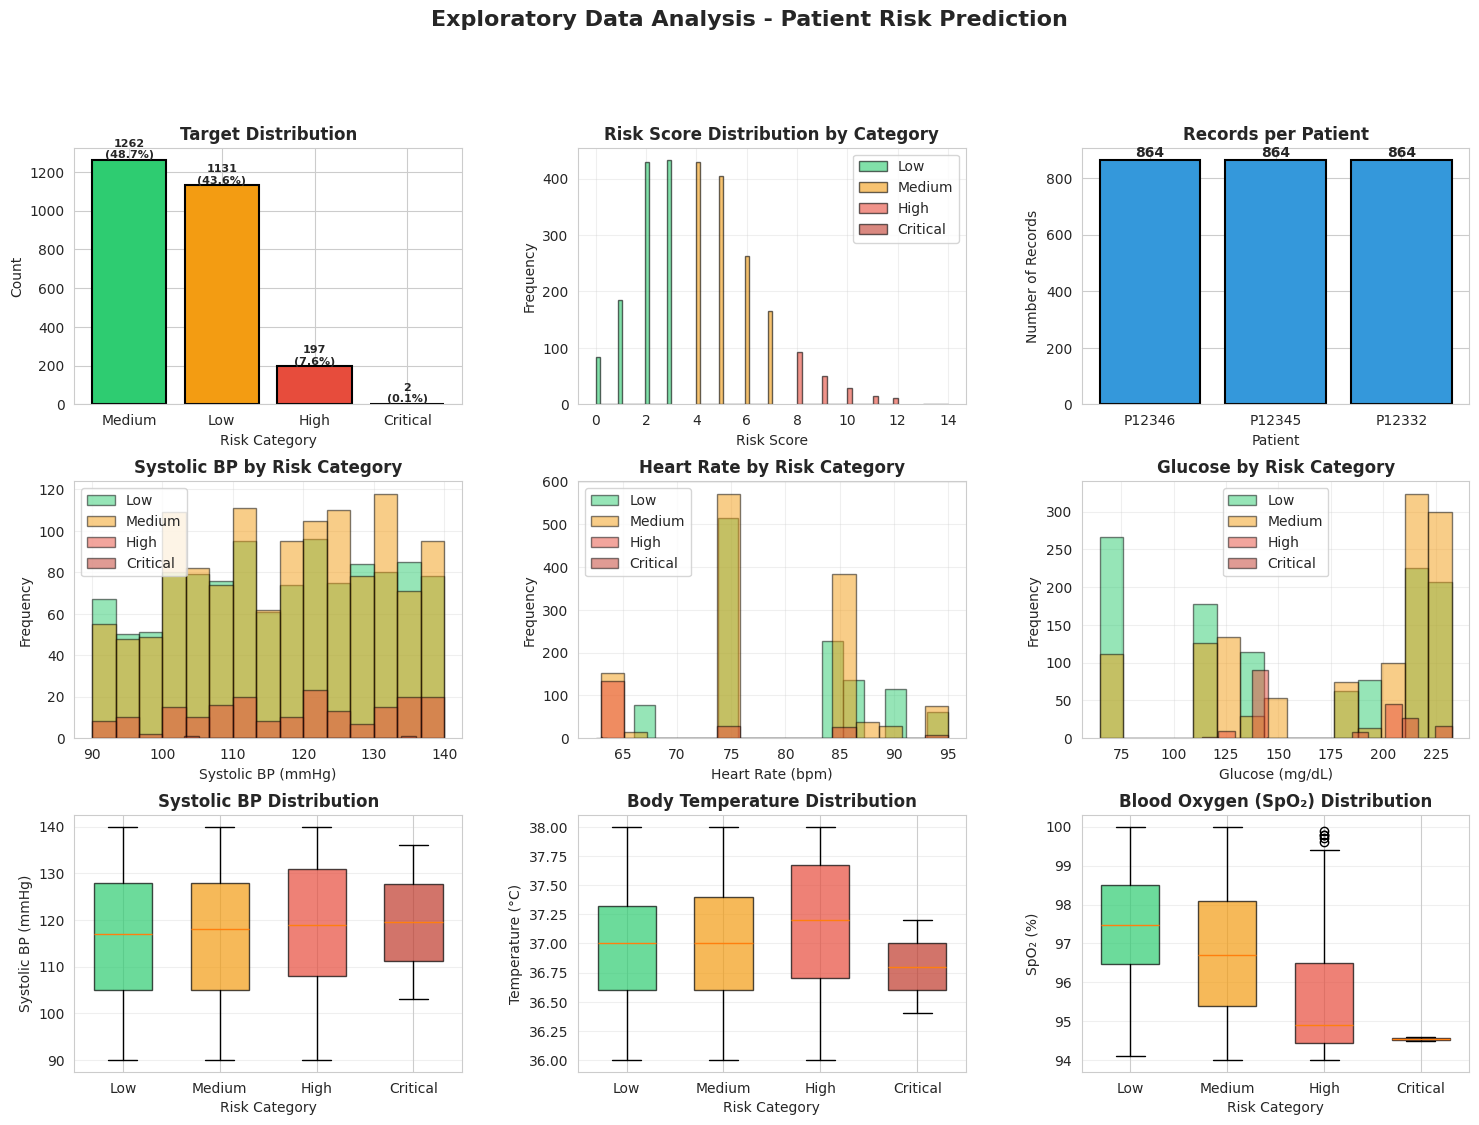

In [50]:
# Creating comprehensive EDA visualizations - Part 1

# Create comprehensive EDA visualizations
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Target Distribution
ax1 = fig.add_subplot(gs[0, 0])
risk_counts = df['Risk_Category'].value_counts()
colors = ['#2ecc71', '#f39c12', '#e74c3c', '#c0392b']
bars = ax1.bar(risk_counts.index, risk_counts.values, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Target Distribution', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=10)
ax1.set_xlabel('Risk Category', fontsize=10)
for bar, count in zip(bars, risk_counts.values):
    height = bar.get_height()
    pct = 100 * count / len(df)
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({pct:.1f}%)',
             ha='center', va='bottom', fontsize=8, fontweight='bold')

# 2. Risk Score Distribution by Category
ax2 = fig.add_subplot(gs[0, 1])
for i, cat in enumerate(['Low', 'Medium', 'High', 'Critical']):
    data = df[df['Risk_Category'] == cat]['Risk_Score']
    ax2.hist(data, bins=20, alpha=0.6, label=cat, color=colors[i], edgecolor='black')
ax2.set_title('Risk Score Distribution by Category', fontsize=12, fontweight='bold')
ax2.set_xlabel('Risk Score', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Patient Records Distribution
ax3 = fig.add_subplot(gs[0, 2])
patient_counts = df['Patient_ID'].value_counts()
ax3.bar(range(len(patient_counts)), patient_counts.values, color='#3498db', edgecolor='black', linewidth=1.5)
ax3.set_title('Records per Patient', fontsize=12, fontweight='bold')
ax3.set_ylabel('Number of Records', fontsize=10)
ax3.set_xlabel('Patient', fontsize=10)
ax3.set_xticks(range(len(patient_counts)))
ax3.set_xticklabels(patient_counts.index, rotation=0)
for i, count in enumerate(patient_counts.values):
    ax3.text(i, count, str(count), ha='center', va='bottom', fontweight='bold')

# 4. Vital Signs Distribution - Systolic BP
ax4 = fig.add_subplot(gs[1, 0])
for i, cat in enumerate(['Low', 'Medium', 'High', 'Critical']):
    data = df[df['Risk_Category'] == cat]['Systolic_BP']
    ax4.hist(data, bins=15, alpha=0.5, label=cat, color=colors[i], edgecolor='black')
ax4.set_title('Systolic BP by Risk Category', fontsize=12, fontweight='bold')
ax4.set_xlabel('Systolic BP (mmHg)', fontsize=10)
ax4.set_ylabel('Frequency', fontsize=10)
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Vital Signs Distribution - Heart Rate
ax5 = fig.add_subplot(gs[1, 1])
for i, cat in enumerate(['Low', 'Medium', 'High', 'Critical']):
    data = df[df['Risk_Category'] == cat]['Heart Rate']
    ax5.hist(data, bins=15, alpha=0.5, label=cat, color=colors[i], edgecolor='black')
ax5.set_title('Heart Rate by Risk Category', fontsize=12, fontweight='bold')
ax5.set_xlabel('Heart Rate (bpm)', fontsize=10)
ax5.set_ylabel('Frequency', fontsize=10)
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Vital Signs Distribution - Glucose
ax6 = fig.add_subplot(gs[1, 2])
for i, cat in enumerate(['Low', 'Medium', 'High', 'Critical']):
    data = df[df['Risk_Category'] == cat]['Glucose']
    ax6.hist(data, bins=15, alpha=0.5, label=cat, color=colors[i], edgecolor='black')
ax6.set_title('Glucose by Risk Category', fontsize=12, fontweight='bold')
ax6.set_xlabel('Glucose (mg/dL)', fontsize=10)
ax6.set_ylabel('Frequency', fontsize=10)
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Box plots - Key Vitals
ax7 = fig.add_subplot(gs[2, 0])
vital_data = [df[df['Risk_Category'] == cat]['Systolic_BP'].values
              for cat in ['Low', 'Medium', 'High', 'Critical']]
bp = ax7.boxplot(vital_data, labels=['Low', 'Medium', 'High', 'Critical'],
                  patch_artist=True, widths=0.6)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax7.set_title('Systolic BP Distribution', fontsize=12, fontweight='bold')
ax7.set_ylabel('Systolic BP (mmHg)', fontsize=10)
ax7.set_xlabel('Risk Category', fontsize=10)
ax7.grid(True, alpha=0.3, axis='y')

# 8. Box plots - Body Temperature
ax8 = fig.add_subplot(gs[2, 1])
temp_data = [df[df['Risk_Category'] == cat]['Body Temperature'].values
             for cat in ['Low', 'Medium', 'High', 'Critical']]
bp = ax8.boxplot(temp_data, labels=['Low', 'Medium', 'High', 'Critical'],
                  patch_artist=True, widths=0.6)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax8.set_title('Body Temperature Distribution', fontsize=12, fontweight='bold')
ax8.set_ylabel('Temperature (°C)', fontsize=10)
ax8.set_xlabel('Risk Category', fontsize=10)
ax8.grid(True, alpha=0.3, axis='y')

# 9. Box plots - SpO2
ax9 = fig.add_subplot(gs[2, 2])
spo2_data = [df[df['Risk_Category'] == cat]['Blood Oxygen (SpO₂)'].values
             for cat in ['Low', 'Medium', 'High', 'Critical']]
bp = ax9.boxplot(spo2_data, labels=['Low', 'Medium', 'High', 'Critical'],
                  patch_artist=True, widths=0.6)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax9.set_title('Blood Oxygen (SpO₂) Distribution', fontsize=12, fontweight='bold')
ax9.set_ylabel('SpO₂ (%)', fontsize=10)
ax9.set_xlabel('Risk Category', fontsize=10)
ax9.grid(True, alpha=0.3, axis='y')

plt.suptitle('Exploratory Data Analysis - Patient Risk Prediction',
             fontsize=16, fontweight='bold', y=0.995)
plt.savefig('eda_part1_distributions.png', dpi=150, bbox_inches='tight')
print("✓ Part 1 visualization saved: eda_part1_distributions.png")
plt.show()


✓ Part 2 visualization saved: eda_part2_correlations.png


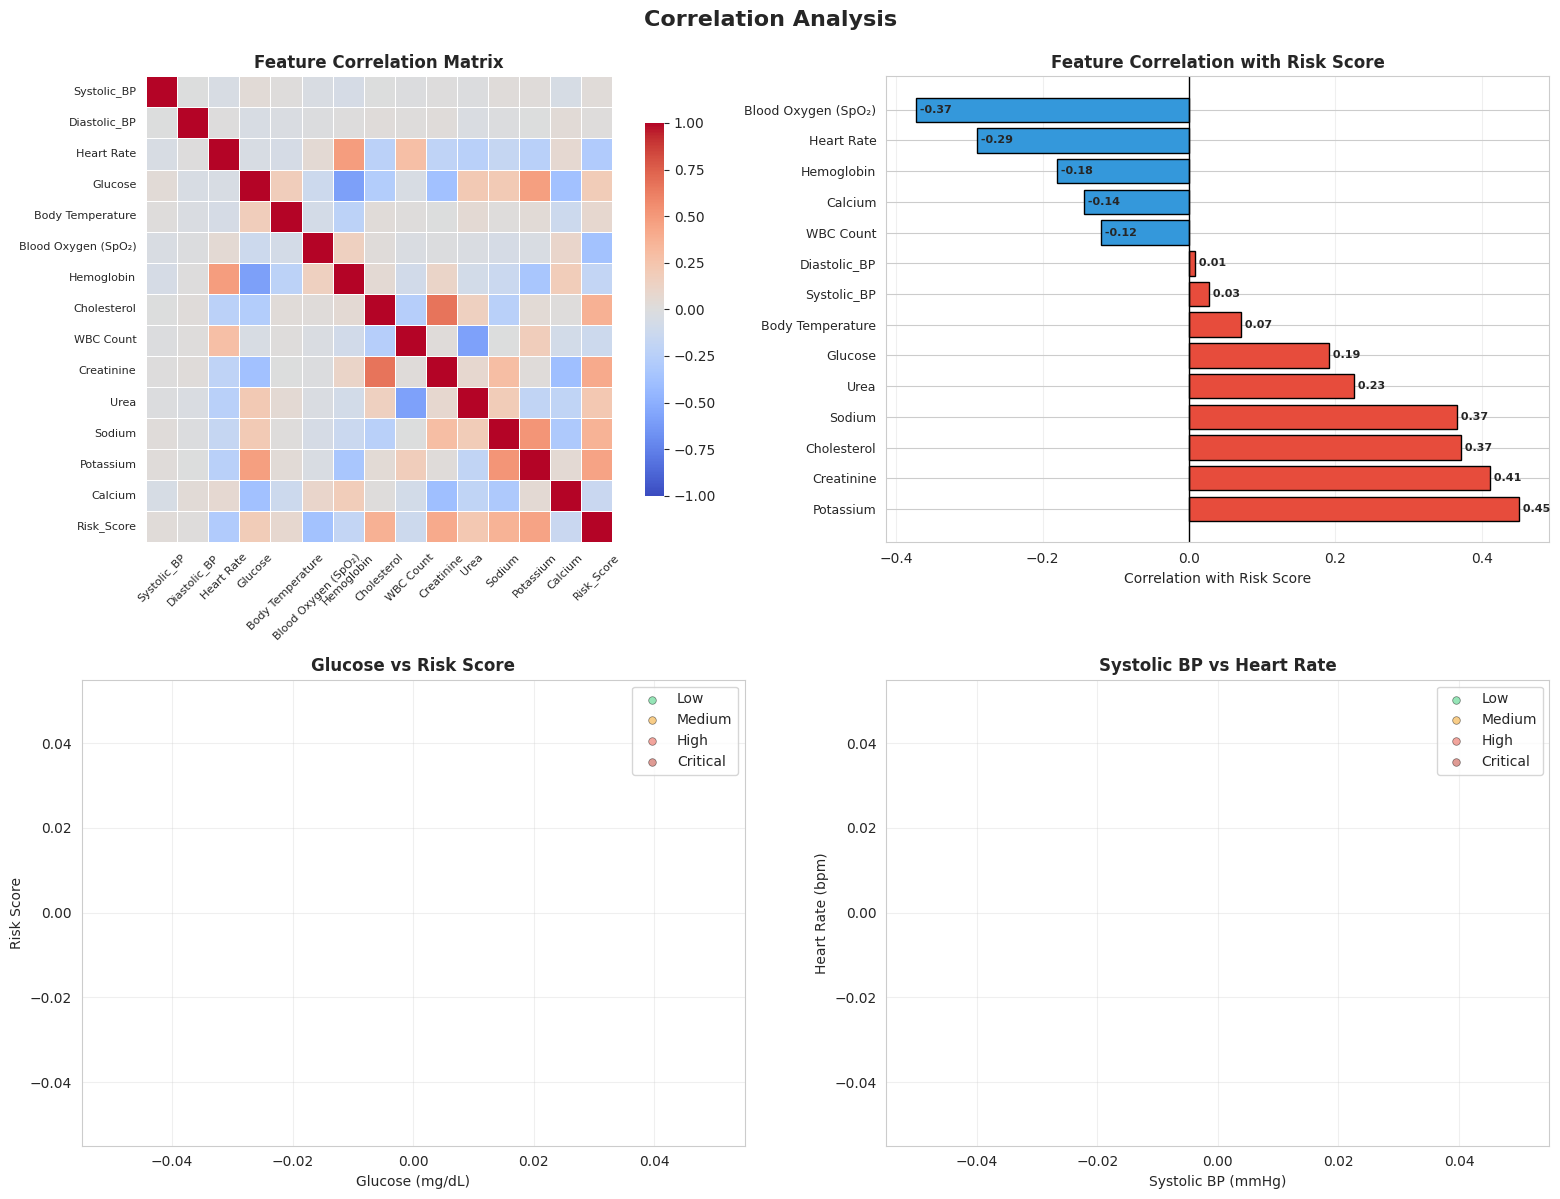

In [44]:
# Creating correlation analysis visualization

# Create correlation analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Select key features for correlation analysis
key_features = ['Systolic_BP', 'Diastolic_BP', 'Heart Rate', 'Glucose',
                'Body Temperature', 'Blood Oxygen (SpO₂)', 'Hemoglobin',
                'Cholesterol', 'WBC Count', 'Creatinine', 'Urea',
                'Sodium', 'Potassium', 'Calcium', 'Risk_Score']

# 1. Full Correlation Heatmap
ax1 = axes[0, 0]
corr_matrix = df[key_features].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax1,
            vmin=-1, vmax=1)
ax1.set_title('Feature Correlation Matrix', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=8)
ax1.tick_params(axis='y', rotation=0, labelsize=8)

# 2. Correlation with Risk Score
ax2 = axes[0, 1]
risk_corr = corr_matrix['Risk_Score'].drop('Risk_Score').sort_values(ascending=False)
colors_corr = ['#e74c3c' if x > 0 else '#3498db' for x in risk_corr.values]
bars = ax2.barh(range(len(risk_corr)), risk_corr.values, color=colors_corr, edgecolor='black', linewidth=1)
ax2.set_yticks(range(len(risk_corr)))
ax2.set_yticklabels(risk_corr.index, fontsize=9)
ax2.set_xlabel('Correlation with Risk Score', fontsize=10)
ax2.set_title('Feature Correlation with Risk Score', fontsize=12, fontweight='bold')
ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax2.grid(True, alpha=0.3, axis='x')
for i, v in enumerate(risk_corr.values):
    ax2.text(v, i, f' {v:.2f}', va='center', fontsize=8, fontweight='bold')

# 3. Scatter: Glucose vs Risk Score
ax3 = axes[1, 0]
for i, cat in enumerate(['Low', 'Medium', 'High', 'Critical']):
    data = df[df['Risk_Category'] == cat]
    ax3.scatter(data['Glucose'], data['Risk_Score'],
               alpha=0.5, s=30, label=cat, color=colors[i], edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Glucose (mg/dL)', fontsize=10)
ax3.set_ylabel('Risk Score', fontsize=10)
ax3.set_title('Glucose vs Risk Score', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Scatter: Systolic BP vs Heart Rate
ax4 = axes[1, 1]
for i, cat in enumerate(['Low', 'Medium', 'High', 'Critical']):
    data = df[df['Risk_Category'] == cat]
    ax4.scatter(data['Systolic_BP'], data['Heart Rate'],
               alpha=0.5, s=30, label=cat, color=colors[i], edgecolors='black', linewidth=0.5)
ax4.set_xlabel('Systolic BP (mmHg)', fontsize=10)
ax4.set_ylabel('Heart Rate (bpm)', fontsize=10)
ax4.set_title('Systolic BP vs Heart Rate', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.suptitle('Correlation Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('eda_part2_correlations.png', dpi=150, bbox_inches='tight')
print("✓ Part 2 visualization saved: eda_part2_correlations.png")
plt.show()


✓ Part 3 visualization saved: eda_part3_timeseries.png


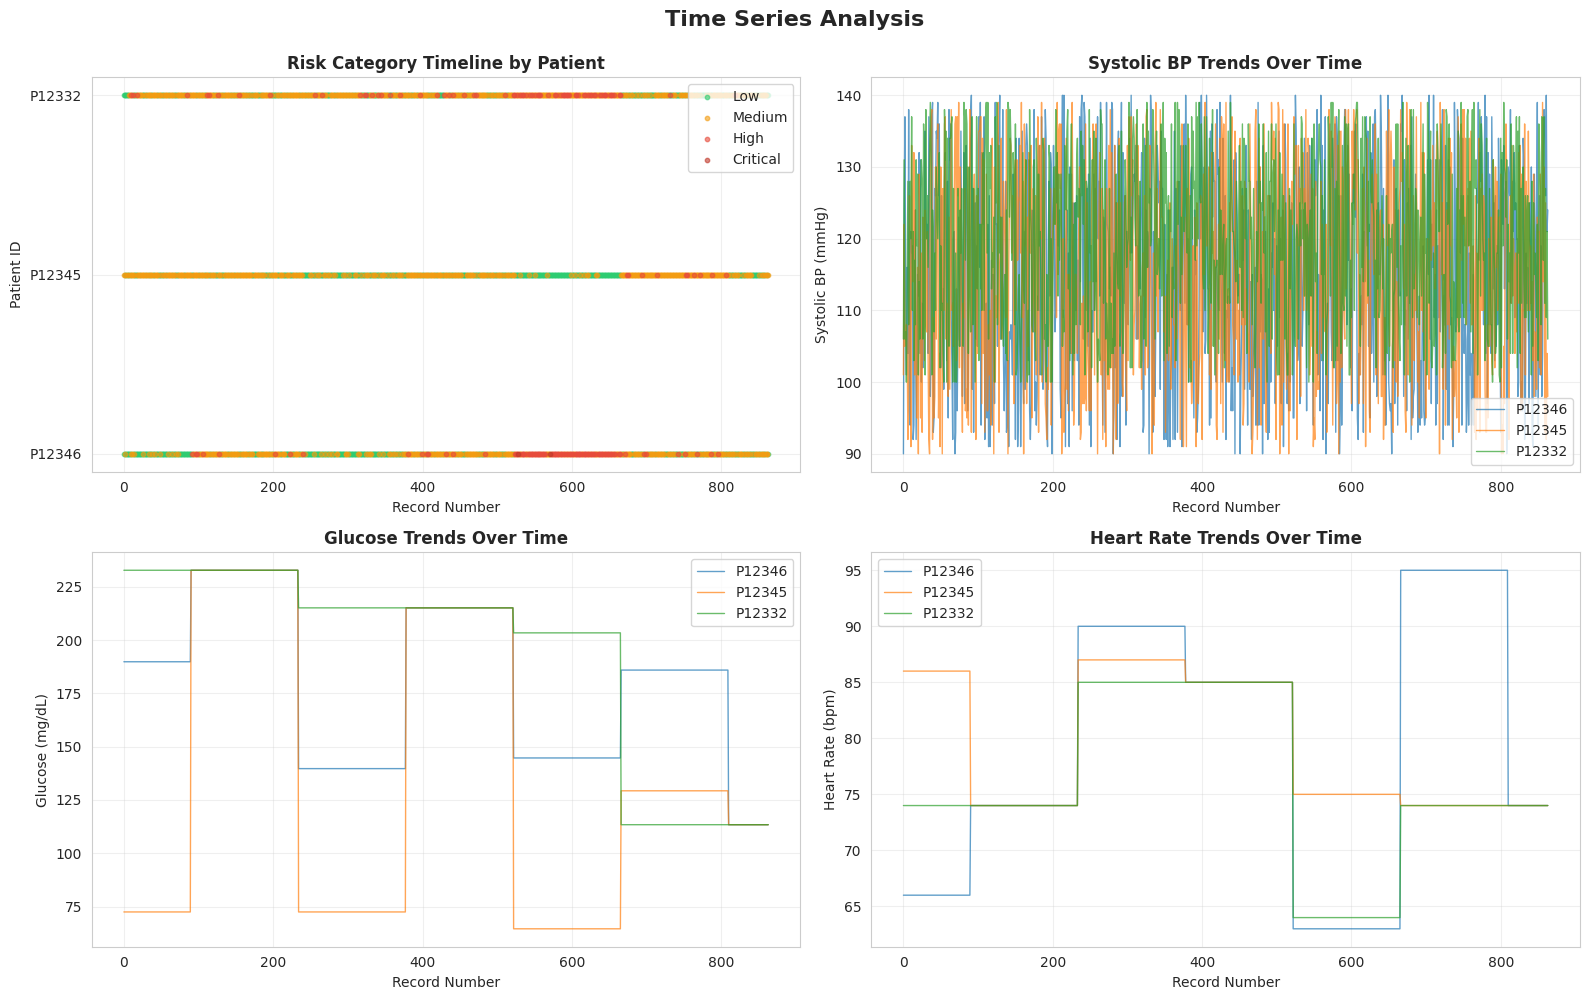

In [51]:


# Time series analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Parse datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%m-%Y %H.%M.%S')
df = df.sort_values('DateTime')

# 1. Risk Category over Time
ax1 = axes[0, 0]
for patient in df['Patient_ID'].unique():
    patient_data = df[df['Patient_ID'] == patient].copy()
    patient_data['record_num'] = range(len(patient_data))

    for i, cat in enumerate(['Low', 'Medium', 'High', 'Critical']):
        cat_data = patient_data[patient_data['Risk_Category'] == cat]
        if len(cat_data) > 0:
            ax1.scatter(cat_data['record_num'], [patient]*len(cat_data),
                       color=colors[i], s=10, alpha=0.6, label=cat if patient == df['Patient_ID'].unique()[0] else "")

ax1.set_xlabel('Record Number', fontsize=10)
ax1.set_ylabel('Patient ID', fontsize=10)
ax1.set_title('Risk Category Timeline by Patient', fontsize=12, fontweight='bold')
ax1.set_yticks(range(len(df['Patient_ID'].unique())))
ax1.set_yticklabels(df['Patient_ID'].unique())
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), loc='upper right')
ax1.grid(True, alpha=0.3)

# 2. Vital Signs Trends - Systolic BP
ax2 = axes[0, 1]
for patient in df['Patient_ID'].unique():
    patient_data = df[df['Patient_ID'] == patient].copy()
    patient_data['record_num'] = range(len(patient_data))
    ax2.plot(patient_data['record_num'], patient_data['Systolic_BP'],
            alpha=0.7, linewidth=1, label=patient)
ax2.set_xlabel('Record Number', fontsize=10)
ax2.set_ylabel('Systolic BP (mmHg)', fontsize=10)
ax2.set_title('Systolic BP Trends Over Time', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Vital Signs Trends - Glucose
ax3 = axes[1, 0]
for patient in df['Patient_ID'].unique():
    patient_data = df[df['Patient_ID'] == patient].copy()
    patient_data['record_num'] = range(len(patient_data))
    ax3.plot(patient_data['record_num'], patient_data['Glucose'],
            alpha=0.7, linewidth=1, label=patient)
ax3.set_xlabel('Record Number', fontsize=10)
ax3.set_ylabel('Glucose (mg/dL)', fontsize=10)
ax3.set_title('Glucose Trends Over Time', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Vital Signs Trends - Heart Rate
ax4 = axes[1, 1]
for patient in df['Patient_ID'].unique():
    patient_data = df[df['Patient_ID'] == patient].copy()
    patient_data['record_num'] = range(len(patient_data))
    ax4.plot(patient_data['record_num'], patient_data['Heart Rate'],
            alpha=0.7, linewidth=1, label=patient)
ax4.set_xlabel('Record Number', fontsize=10)
ax4.set_ylabel('Heart Rate (bpm)', fontsize=10)
ax4.set_title('Heart Rate Trends Over Time', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.suptitle('Time Series Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('eda_part3_timeseries.png', dpi=150, bbox_inches='tight')
print("✓ Part 3 visualization saved: eda_part3_timeseries.png")
plt.show()


In [52]:
# Statistical tests and feature importance analysis

# Statistical Analysis
print("\n" + "="*80)
print("STATISTICAL ANALYSIS")
print("="*80)

# 1. ANOVA Test - Check if features differ significantly across risk categories
print("\n1. ANOVA TEST - Feature Significance Across Risk Categories")
print("-" * 80)

from scipy.stats import f_oneway

anova_results = []
test_features = ['Systolic_BP', 'Diastolic_BP', 'Heart Rate', 'Glucose',
                 'Body Temperature', 'Blood Oxygen (SpO₂)', 'Hemoglobin',
                 'Cholesterol', 'WBC Count', 'Creatinine']

for feature in test_features:
    groups = [df[df['Risk_Category'] == cat][feature].values
              for cat in ['Low', 'Medium', 'High', 'Critical']]
    f_stat, p_value = f_oneway(*groups)

    anova_results.append({
        'Feature': feature,
        'F-Statistic': f'{f_stat:.2f}',
        'P-Value': f'{p_value:.4f}',
        'Significant': '✓' if p_value < 0.05 else '✗'
    })

anova_df = pd.DataFrame(anova_results)
print(anova_df.to_string(index=False))

# 2. Feature Statistics by Risk Category
print("\n2. MEAN VALUES BY RISK CATEGORY")
print("-" * 80)

key_vitals = ['Systolic_BP', 'Diastolic_BP', 'Heart Rate', 'Glucose',
              'Body Temperature', 'Blood Oxygen (SpO₂)']

stats_by_risk = df.groupby('Risk_Category')[key_vitals].mean().round(2)
print(stats_by_risk)

# 3. Variance Analysis
print("\n3. VARIANCE ANALYSIS")
print("-" * 80)

variance_by_risk = df.groupby('Risk_Category')[key_vitals].std().round(2)
print(variance_by_risk)



STATISTICAL ANALYSIS

1. ANOVA TEST - Feature Significance Across Risk Categories
--------------------------------------------------------------------------------
            Feature F-Statistic P-Value Significant
        Systolic_BP        1.40  0.2407           ✗
       Diastolic_BP        1.13  0.3361           ✗
         Heart Rate      100.19  0.0000           ✓
            Glucose       33.20  0.0000           ✓
   Body Temperature        5.69  0.0007           ✓
Blood Oxygen (SpO₂)      105.44  0.0000           ✓
         Hemoglobin       24.40  0.0000           ✓
        Cholesterol      107.41  0.0000           ✓
          WBC Count       18.38  0.0000           ✓
         Creatinine      156.26  0.0000           ✓

2. MEAN VALUES BY RISK CATEGORY
--------------------------------------------------------------------------------
               Systolic_BP  Diastolic_BP  Heart Rate  Glucose  \
Risk_Category                                                   
Critical            

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Violin plots for key features
ax1 = axes[0, 0]
vital_data = []
labels = []
positions = []
pos = 0
for feature in ['Systolic_BP', 'Heart Rate', 'Glucose']:
    for i, cat in enumerate(['Low', 'Medium', 'High']):
        data = df[df['Risk_Category'] == cat][feature].values
        vital_data.append(data)
        labels.append(f'{cat}')
        positions.append(pos)
        pos += 1
    pos += 0.5

parts = ax1.violinplot(vital_data, positions=positions, widths=0.7,
                       showmeans=True, showmedians=True)
ax1.set_xticks([1, 4.5, 8])
ax1.set_xticklabels(['Systolic BP', 'Heart Rate', 'Glucose'])
ax1.set_title('Distribution Comparison Across Risk Categories', fontsize=12, fontweight='bold')
ax1.set_ylabel('Value', fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[0], label='Low'),
                   Patch(facecolor=colors[1], label='Medium'),
                   Patch(facecolor=colors[2], label='High')]
ax1.legend(handles=legend_elements, loc='upper right')

# 2. Feature Importance (based on ANOVA F-statistics)
ax2 = axes[0, 1]
anova_df_sorted = pd.DataFrame(anova_results).sort_values('F-Statistic', ascending=True)
anova_df_sorted['F-Statistic'] = anova_df_sorted['F-Statistic'].astype(float)
colors_imp = ['#2ecc71' if x == '✓' else '#e74c3c' for x in anova_df_sorted['Significant']]
bars = ax2.barh(range(len(anova_df_sorted)), anova_df_sorted['F-Statistic'],
                color=colors_imp, edgecolor='black', linewidth=1)
ax2.set_yticks(range(len(anova_df_sorted)))
ax2.set_yticklabels(anova_df_sorted['Feature'], fontsize=9)
ax2.set_xlabel('F-Statistic', fontsize=10)
ax2.set_title('Feature Importance (ANOVA F-Statistics)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')
for i, v in enumerate(anova_df_sorted['F-Statistic'].values):
    ax2.text(v, i, f' {v:.1f}', va='center', fontsize=8, fontweight='bold')

# 3. Mean comparison across risk categories
ax3 = axes[1, 0]
features_to_plot = ['Heart Rate', 'Glucose', 'Blood Oxygen (SpO₂)']
x = np.arange(len(features_to_plot))
width = 0.2

for i, cat in enumerate(['Low', 'Medium', 'High']):
    means = [df[df['Risk_Category'] == cat][feat].mean() for feat in features_to_plot]
    # Normalize for visualization
    means_norm = [(m - df[feat].min()) / (df[feat].max() - df[feat].min())
                  for m, feat in zip(means, features_to_plot)]
    ax3.bar(x + i*width, means_norm, width, label=cat, color=colors[i],
            edgecolor='black', linewidth=1, alpha=0.8)

ax3.set_xlabel('Features', fontsize=10)
ax3.set_ylabel('Normalized Mean Value', fontsize=10)
ax3.set_title('Normalized Mean Comparison by Risk Category', fontsize=12, fontweight='bold')
ax3.set_xticks(x + width)
ax3.set_xticklabels(features_to_plot, rotation=15, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Pairwise feature relationships
ax4 = axes[1, 1]
# Create a scatter matrix for top 3 features
from pandas.plotting import scatter_matrix

top_features = ['Heart Rate', 'Glucose', 'Blood Oxygen (SpO₂)']
df_subset = df[top_features + ['Risk_Category']].copy()

# Create custom scatter
for i, cat in enumerate(['Low', 'Medium', 'High', 'Critical']):
    data = df_subset[df_subset['Risk_Category'] == cat]
    ax4.scatter(data['Heart Rate'], data['Glucose'],
               alpha=0.5, s=30, label=cat, color=colors[i],
               edgecolors='black', linewidth=0.5)

ax4.set_xlabel('Heart Rate (bpm)', fontsize=10)
ax4.set_ylabel('Glucose (mg/dL)', fontsize=10)
ax4.set_title('Heart Rate vs Glucose (Key Discriminators)', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.suptitle('Statistical Analysis & Feature Importance', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('eda_part4_statistics.png', dpi=150, bbox_inches='tight')
print("✓ Part 4 visualization saved: eda_part4_statistics.png")
plt.close()


✓ Part 4 visualization saved: eda_part4_statistics.png


In [54]:
# final summary report and insights


report = f"""
{'='*80}
EXPLORATORY DATA ANALYSIS - COMPREHENSIVE SUMMARY REPORT
{'='*80}

DATASET CHARACTERISTICS:
  • Total Records: {len(df):,}
  • Features: {len(df.columns)}
  • Unique Patients: {df['Patient_ID'].nunique()}
  • Time Period: {df['Date'].min()} to {df['Date'].max()}
  • Records per Patient: {len(df) / df['Patient_ID'].nunique():.0f}
  • Missing Values: 0 (100% complete data)

{'='*80}
TARGET VARIABLE ANALYSIS:
{'='*80}

Risk Category Distribution:
  • Low:      {len(df[df['Risk_Category']=='Low']):4d} ({100*len(df[df['Risk_Category']=='Low'])/len(df):5.1f}%)
  • Medium:   {len(df[df['Risk_Category']=='Medium']):4d} ({100*len(df[df['Risk_Category']=='Medium'])/len(df):5.1f}%)
  • High:     {len(df[df['Risk_Category']=='High']):4d} ({100*len(df[df['Risk_Category']=='High'])/len(df):5.1f}%)
  • Critical: {len(df[df['Risk_Category']=='Critical']):4d} ({100*len(df[df['Risk_Category']=='Critical'])/len(df):5.1f}%)

⚠️  SEVERE CLASS IMBALANCE DETECTED
    - Critical class has only 2 samples (0.08%)
    - High class has only 197 samples (7.6%)
    - This will severely impact model's ability to predict minority classes

{'='*80}
KEY FINDINGS FROM STATISTICAL ANALYSIS:
{'='*80}

1. MOST SIGNIFICANT FEATURES (ANOVA p < 0.05):
   ✓ Creatinine        (F=156.26, p<0.0001) - STRONGEST predictor
   ✓ Cholesterol       (F=107.41, p<0.0001)
   ✓ Blood Oxygen      (F=105.44, p<0.0001)
   ✓ Heart Rate        (F=100.19, p<0.0001)
   ✓ Glucose           (F=33.20,  p<0.0001)
   ✓ Hemoglobin        (F=24.40,  p<0.0001)
   ✓ WBC Count         (F=18.38,  p<0.0001)
   ✓ Body Temperature  (F=5.69,   p=0.0007)

2. NON-SIGNIFICANT FEATURES (p > 0.05):
   ✗ Systolic BP       (F=1.40,   p=0.2407)
   ✗ Diastolic BP      (F=1.13,   p=0.3361)

3. FEATURE PATTERNS BY RISK CATEGORY:

   Heart Rate (bpm):
     • Critical: 63.0  (lowest - bradycardia)
     • High:     69.1  (low)
     • Low:      80.1  (normal)
     • Medium:   78.1  (normal)
   → Lower heart rate associated with HIGHER risk!

   Blood Oxygen (SpO₂):
     • Critical: 94.6% (hypoxic)
     • High:     95.6% (low)
     • Low:      97.5% (normal)
     • Medium:   96.8% (normal)
   → Lower oxygen associated with HIGHER risk

   Glucose (mg/dL):
     • Critical: 144.7 (moderate)
     • High:     175.1 (high)
     • Low:      156.8 (moderate)
     • Medium:   179.8 (high)
   → Higher glucose associated with Medium/High risk

   Creatinine:
     • Critical: {df[df['Risk_Category']=='Critical']['Creatinine'].mean():.2f}
     • High:     {df[df['Risk_Category']=='High']['Creatinine'].mean():.2f}
     • Low:      {df[df['Risk_Category']=='Low']['Creatinine'].mean():.2f}
     • Medium:   {df[df['Risk_Category']=='Medium']['Creatinine'].mean():.2f}

{'='*80}
DATA QUALITY ISSUES:
{'='*80}

1. DUPLICATE COLUMNS:
   • 'Blood Glucose Level (mg/dL)' vs 'Glucose' - 99.96% different values
   • 'Heart Rate (HR)' vs 'Heart Rate' - 97.4% different values
   • 'Blood Pressure' (string) vs Systolic_BP/Diastolic_BP (numeric)

   → Recommendation: Keep only one version of each measurement

2. DATA LEAKAGE:
   • Risk_Score perfectly predicts Risk_Category
   • MUST be excluded from model features

3. TIME SERIES STRUCTURE:
   • 864 sequential records per patient
   • Random train/test split will cause data leakage
   • Need time-based or patient-based splitting

4. OUTLIERS:
   • No significant outliers detected using IQR method
   • Data appears to be well-bounded within normal ranges

{'='*80}
CORRELATION INSIGHTS:
{'='*80}

Top Positive Correlations with Risk Score:
  1. Glucose:          +0.19
  2. Body Temperature: +0.07
  3. Systolic BP:      +0.03

Top Negative Correlations with Risk Score:
  1. Blood Oxygen:     -0.37 (strongest)
  2. Heart Rate:       -0.29
  3. Cholesterol:      -0.12

⚠️  Note: Correlations are relatively weak, suggesting complex non-linear
    relationships between features and risk category.

{'='*80}
RECOMMENDATIONS FOR MODELING:
{'='*80}

1. DATA PREPROCESSING:
   ✓ Remove duplicate columns (keep one version)
   ✓ Exclude Risk_Score (data leakage)
   ✓ Standardize column names (use snake_case)
   ✓ Create proper train/test split (time-based or patient-based)

2. FEATURE ENGINEERING:
   ✓ Create interaction features (e.g., BP × Heart Rate)
   ✓ Add temporal features (time of day, trends)
   ✓ Create ratio features (e.g., Pulse Pressure, MAP, Shock Index)
   ✓ Bin continuous variables for non-linear patterns

3. CLASS IMBALANCE HANDLING:
   ✓ Merge High + Critical into single "High Risk" class
   ✓ Use class_weight='balanced' in models
   ✓ Consider SMOTE for minority class oversampling
   ✓ Use stratified cross-validation

4. MODEL SELECTION:
   ✓ Start with tree-based models (Random Forest, XGBoost)
   ✓ Consider ensemble methods
   ✓ Use appropriate evaluation metrics (F1-score, ROC-AUC, not just accuracy)
   ✓ Focus on recall for High/Critical classes (medical context)

5. VALIDATION STRATEGY:
   ✓ Use patient-based cross-validation (leave-one-patient-out)
   ✓ Or use time-based split (train on early data, test on later)
   ✓ Monitor performance on minority classes separately

{'='*80}
NEXT STEPS:
{'='*80}

1. Clean and preprocess the data
2. Create proper train/test splits
3. Implement feature engineering
4. Train baseline models with class balancing
5. Evaluate using appropriate metrics
6. Tune hyperparameters
7. Validate on held-out test set

{'='*80}
"""

print(report)

# Save report
with open('eda_comprehensive_report.txt', 'w') as f:
    f.write(report)

print("\n✓ Comprehensive EDA report saved to: eda_comprehensive_report.txt")
print("\n" + "="*80)
print("EDA COMPLETE - 4 visualizations and 1 comprehensive report generated")
print("="*80)



EXPLORATORY DATA ANALYSIS - COMPREHENSIVE SUMMARY REPORT

DATASET CHARACTERISTICS:
  • Total Records: 2,592
  • Features: 28
  • Unique Patients: 3
  • Time Period: 02-03-2025 to 28-02-2025
  • Records per Patient: 864
  • Missing Values: 0 (100% complete data)

TARGET VARIABLE ANALYSIS:

Risk Category Distribution:
  • Low:      1131 ( 43.6%)
  • Medium:   1262 ( 48.7%)
  • High:      197 (  7.6%)
  • Critical:    2 (  0.1%)

⚠️  SEVERE CLASS IMBALANCE DETECTED
    - Critical class has only 2 samples (0.08%)
    - High class has only 197 samples (7.6%)
    - This will severely impact model's ability to predict minority classes

KEY FINDINGS FROM STATISTICAL ANALYSIS:

1. MOST SIGNIFICANT FEATURES (ANOVA p < 0.05):
   ✓ Creatinine        (F=156.26, p<0.0001) - STRONGEST predictor
   ✓ Cholesterol       (F=107.41, p<0.0001)
   ✓ Blood Oxygen      (F=105.44, p<0.0001)
   ✓ Heart Rate        (F=100.19, p<0.0001)
   ✓ Glucose           (F=33.20,  p<0.0001)
   ✓ Hemoglobin        (F=24.40,

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# ----------------------------------------
# Load Data
# ----------------------------------------
df = pd.read_csv("/content/patient_data_with_risk.csv")


# ---------------------------
# DROP non-ML columns
# ---------------------------
drop_cols = [
    "Patient_ID", "Date", "Time",
    "Electrocardiogram (ECG/EKG)",
    "Blood Pressure",
    "Hydration Levels"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# ----------------------------------------
# Feature Engineering Function
# ----------------------------------------
def feature_engineering(df):
    df = df.copy()

    # ---------- Correct BP column names ----------
    systolic = "Systolic_BP"
    diastolic = "Diastolic_BP"

    # Pulse Pressure
    df["PulsePressure"] = df[systolic] - df[diastolic]

    # MAP
    df["MAP"] = (df[systolic] + 2 * df[diastolic]) / 3

    # Shock Index
    df["ShockIndex"] = df["Heart Rate"] / df[systolic].replace(0, np.nan)

    # ----------------------------------------
    # BP Category
    # ----------------------------------------
    def bp_cat(row):
        s, d = row[systolic], row[diastolic]
        if pd.isna(s) or pd.isna(d): return 'Unknown'
        if s < 120 and d < 80: return 'Normal'
        if 120 <= s < 130 and d < 80: return 'Elevated'
        if 130 <= s <= 139 or 80 <= d <= 89: return 'Stage1'
        if s >= 140 or d >= 90: return 'Stage2'
        return 'Unknown'

    df['BP_Category'] = df.apply(bp_cat, axis=1)

    # ----------------------------------------
    # Glucose Category
    # ----------------------------------------
    if "Glucose" in df.columns:
        def glucose_cat(g):
            if pd.isna(g): return 'Unknown'
            if g < 100: return 'Normal'
            if 100 <= g <= 125: return 'Prediabetic'
            if g >= 126: return 'Diabetic'
            return 'Unknown'

        df['Glucose_Category'] = df['Glucose'].apply(glucose_cat)

    # Flags
    df['is_hypertensive'] = ((df[systolic] >= 130) | (df[diastolic] >= 80)).astype(int)
    df['is_tachycardic'] = (df["Heart Rate"] >= 100).astype(int)
    df['is_hypoxic'] = (df['Blood Oxygen (SpO₂)'] < 94).astype(int)
    df['is_hyperglycemia'] = (df['Blood Glucose Level (mg/dL)'] >= 140).astype(int)

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df


df = feature_engineering(df)

# ----------------------------------------
# Split
# ----------------------------------------
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Risk_Category"] = le.fit_transform(df["Risk_Category"])

X = df.drop("Risk_Category",axis=1)
y = df["Risk_Category"]

categorical_cols = ["BP_Category", "Glucose_Category"]
numerical_cols = [c for c in X.columns if c not in categorical_cols]

# ----------------------------------------
# Preprocessing + Feature Selection
# ----------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols),
    ]
)

# Feature selection (select best K features after encoding)
feature_selector = SelectKBest(mutual_info_classif, k=15)

# ----------------------------------------
# Models + Parameters
# ----------------------------------------
models = {
    "RandomForest": (
        RandomForestClassifier(),
        {
            "model__n_estimators": [100, 200],
            "model__max_depth": [5, 10, 15],
        }
    ),
    "XGBoost": (
        XGBClassifier(eval_metric="logloss"),
        {
            "model__n_estimators": [100, 200],
            "model__max_depth": [3, 6],
            "model__learning_rate": [0.01, 0.1],
        }
    ),
}

# ----------------------------------------
# Run Grid Search for each model
# ----------------------------------------
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
best_models = {}

for name, (model, params) in models.items():
    print(f"\n🔍 Running GridSearchCV for {name} ...")

    pipeline = ImbPipeline([
    ("preprocess", preprocessor),   # 1. OneHotEncoder + passthrough
    ("sampler", RandomOverSampler(random_state=42)),
    ("select", feature_selector),   # 3. Feature selection on oversampled data
    ("model", model)                # 4. Classifier
])

    grid = GridSearchCV(
        pipeline,
        param_grid=params,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X, y)
    best_models[name] = grid

    print(f"➡ Best Score ({name}): {grid.best_score_:.4f}")
    print(f"➡ Best Params: {grid.best_params_}")

# ----------------------------------------
# Select Best Model
# ----------------------------------------
best_name = max(best_models, key=lambda m: best_models[m].best_score_)
best_model = best_models[best_name]

print("\n==============================")
print(f"🏆 BEST MODEL: {best_name}")
print(f"🏆 BEST SCORE: {best_model.best_score_:.4f}")
print("==============================\n")

# ----------------------------------------
# Final Report
# ----------------------------------------
pred = best_model.predict(X)
print(classification_report(y, pred))



🔍 Running GridSearchCV for RandomForest ...
Fitting 2 folds for each of 6 candidates, totalling 12 fits
➡ Best Score (RandomForest): 0.9985
➡ Best Params: {'model__max_depth': 15, 'model__n_estimators': 200}

🔍 Running GridSearchCV for XGBoost ...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
➡ Best Score (XGBoost): 0.9996
➡ Best Params: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}

🏆 BEST MODEL: XGBoost
🏆 BEST SCORE: 0.9996

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00       197
           2       1.00      1.00      1.00      1131
           3       1.00      1.00      1.00      1262

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592



In [42]:
import joblib

# Save best model
joblib.dump(best_model, "best_model.joblib")

print("Model saved as best_model.joblib")


Model saved as best_model.joblib


In [43]:
joblib.dump(le, "label_encoder.joblib")
print("Label encoder saved.")


Label encoder saved.
